<a href="https://colab.research.google.com/github/AlirezaAhadipour/Magic-Gamma-Telescope/blob/main/UCI_Magic_Gamma_Telescope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

%matplotlib inline

# DataSet

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Here is a BiBTeX citation as well:

@misc{Dua:2019 ,
author = "Dua, Dheeru and Graff, Casey",
year = "2017",
title = "{UCI} Machine Learning Repository",
url = "http://archive.ics.uci.edu/ml",
institution = "University of California, Irvine, School of Information and Computer Sciences" }

In [2]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df['class'].unique()   # g: gamma, h: hadron

array(['g', 'h'], dtype=object)

In [4]:
df['class'] = (df['class'] == 'g').astype(int) # converts class labels g and h to 1 and 0

In [5]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

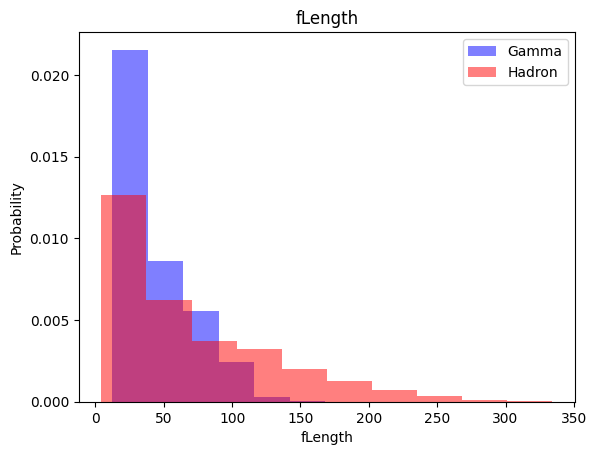

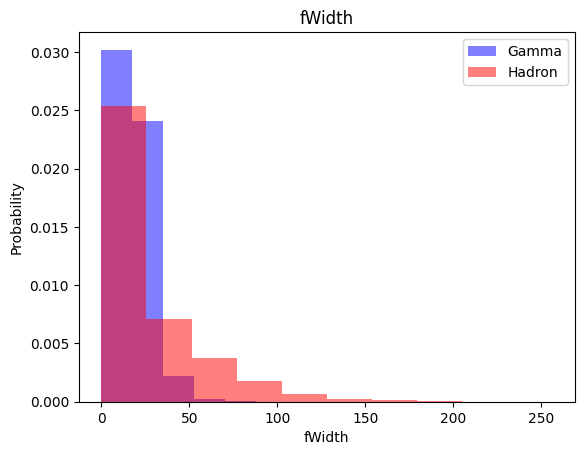

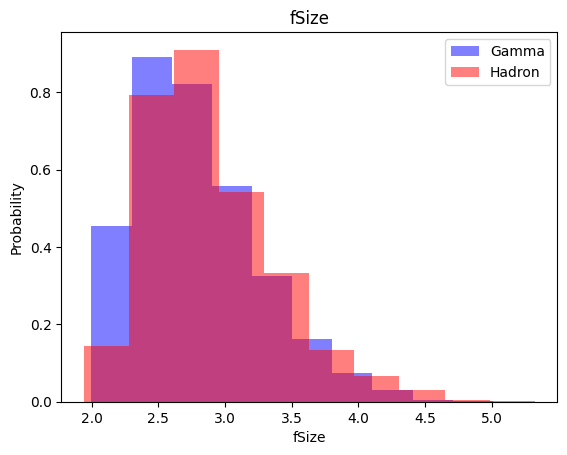

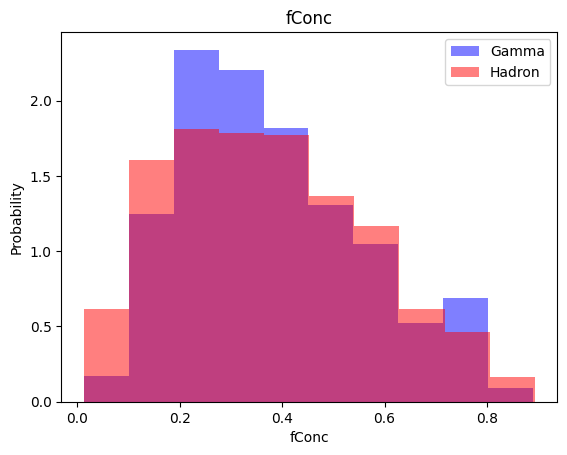

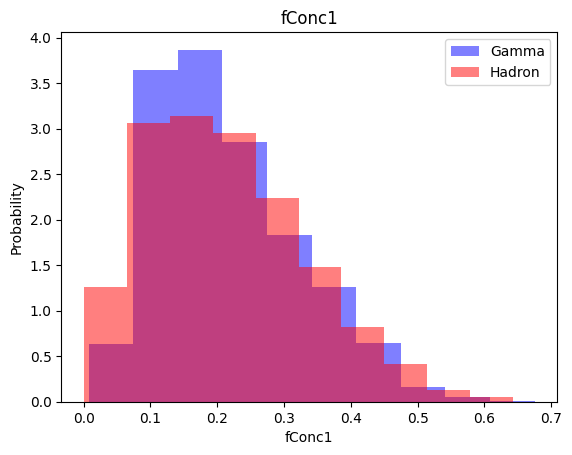

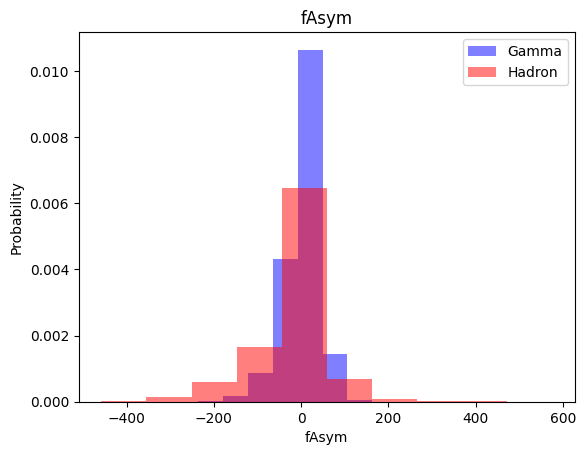

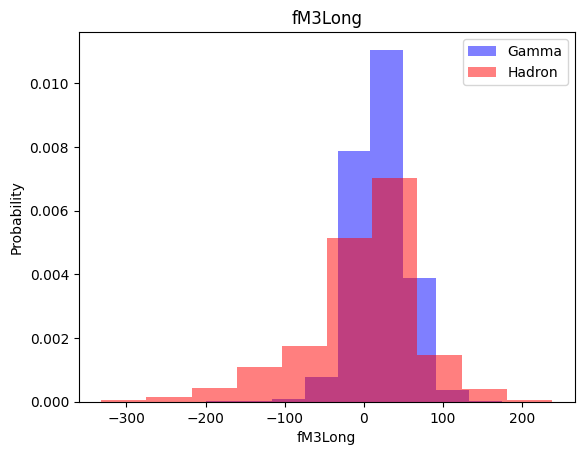

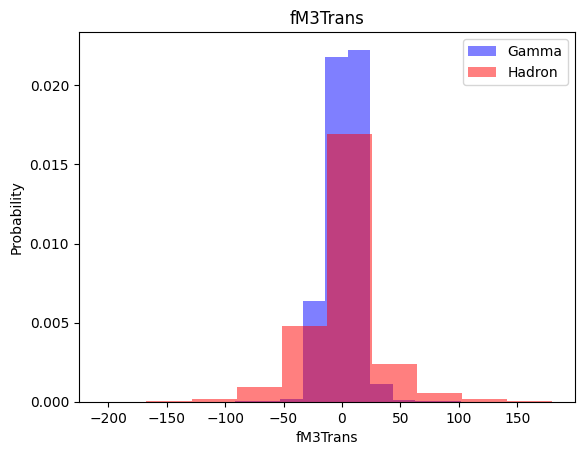

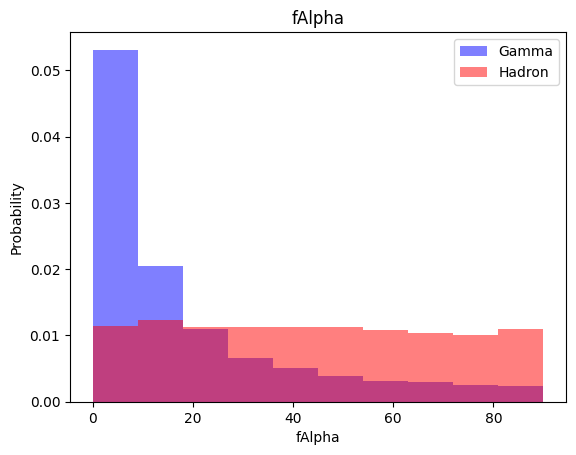

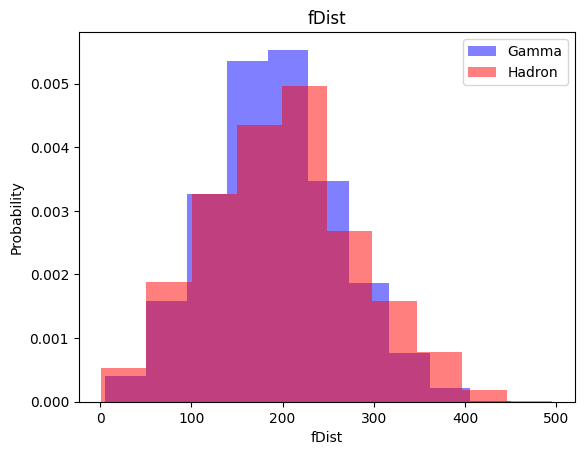

In [6]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label], label='Gamma', color='blue', alpha=0.5, density=True)
  plt.hist(df[df['class']==0][label], label='Hadron', color='red', alpha=0.5, density=True)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Probability')
  plt.legend()
  plt.show()

# Train, Validatation, Test set

In [7]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])

In [8]:
print(len(train[train['class']==1])) # gamma
print(len(train[train['class']==0])) # hadron

7414
3998


# Feature Scaling, OverSampling

In [9]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [10]:
train, X_train, y_train = scale_dataset(train, oversample = True)
valid, X_valid, y_valid = scale_dataset(valid, oversample = False)
test, X_test, y_test = scale_dataset(test, oversample = False)

In [11]:
print(len(y_train))
print(sum(y_train == 1))
print(sum(y_train == 0))

14828
7414
7414


# kNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
y_pred = knn_model.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1393
           1       0.85      0.86      0.85      2411

    accuracy                           0.81      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

In [23]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [27]:
y_pred = nb_model.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.41      0.52      1393
           1       0.73      0.90      0.80      2411

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = lg_model.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      1393
           1       0.84      0.83      0.83      2411

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# SVM

In [34]:
from sklearn.svm import SVC

In [36]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [37]:
y_pred = svm_model.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1393
           1       0.88      0.91      0.90      2411

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.86      0.87      0.86      3804



# Neural Net

In [56]:
import tensorflow as tf

In [53]:
def plot_accuracy(histort):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
  plt.show()

def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['loss', 'val_loss'], loc='upper left')
  plt.show()

In [49]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [51]:
history = nn_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

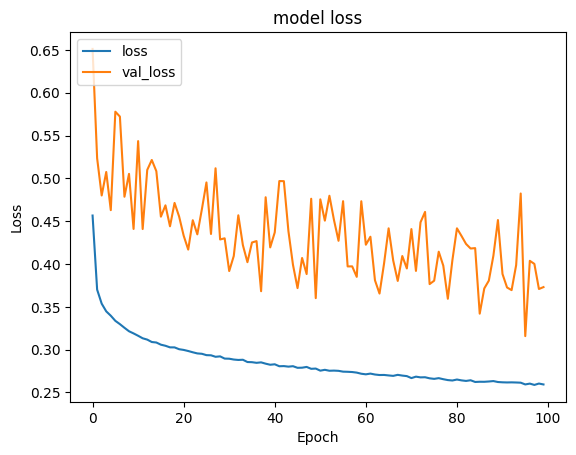

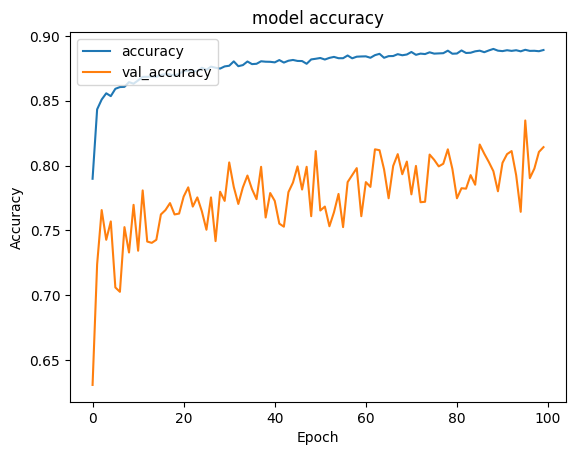

In [54]:
plot_loss(history)
plot_accuracy(history)

In [63]:
def plot_history(histort):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
  ax1.plot(history.history['accuracy'])
  ax1.plot(history.history['val_accuracy'])
  ax1.set_ylabel('Accuracy')
  ax1.set_xlabel('Epoch')
  ax1.legend(['accuracy', 'val_accuracy'], loc='upper left')

  ax2.plot(history.history['loss'])
  ax2.plot(history.history['val_loss'])
  ax2.set_ylabel('Loss')
  ax2.set_xlabel('Epoch')
  ax2.legend(['loss', 'val_loss'], loc='upper left')

  plt.show()

In [64]:
# grid search
def train_model(X_train, y_train, num_nodes, dropout_prob, learn_rate, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(learn_rate),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
  
  history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

  return nn_model, history

num_nodes: 16, dropout: 0, learning_rate: 0.01, batch_size: 32


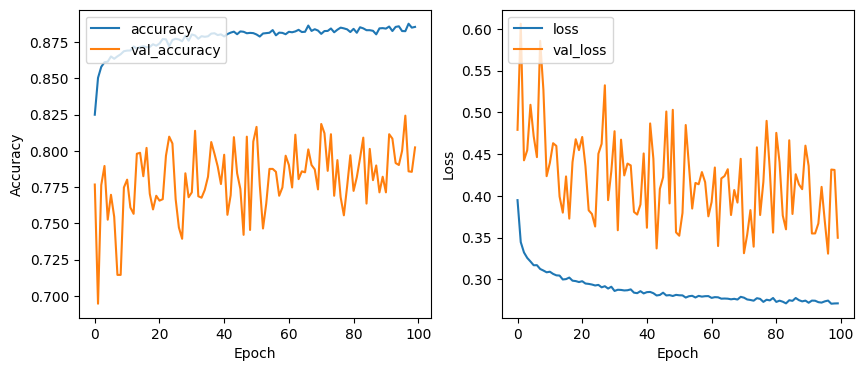

119/119 [==============================] - 0s 1ms/step - loss: 0.3476 - accuracy: 0.8607
num_nodes: 16, dropout: 0, learning_rate: 0.01, batch_size: 64


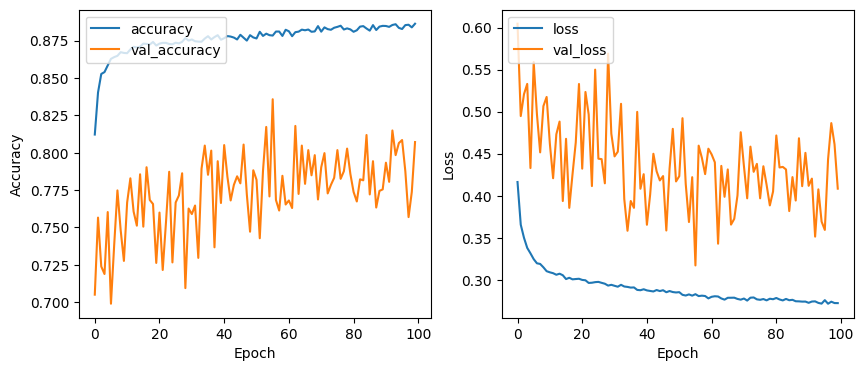

119/119 [==============================] - 0s 1ms/step - loss: 0.3506 - accuracy: 0.8651
num_nodes: 16, dropout: 0, learning_rate: 0.01, batch_size: 128


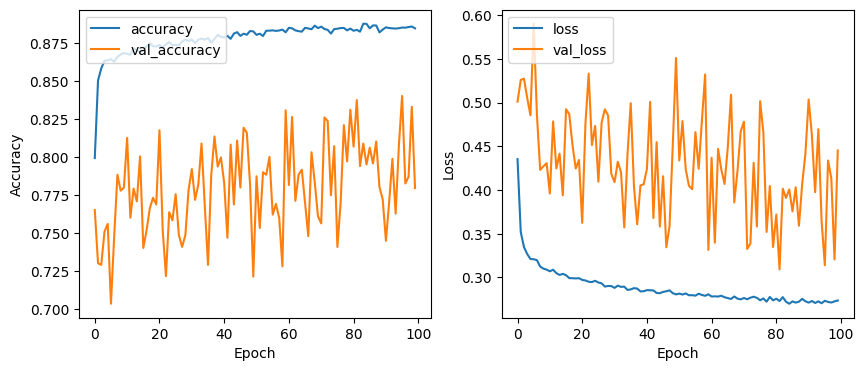

119/119 [==============================] - 0s 1ms/step - loss: 0.3401 - accuracy: 0.8641
num_nodes: 16, dropout: 0, learning_rate: 0.001, batch_size: 32


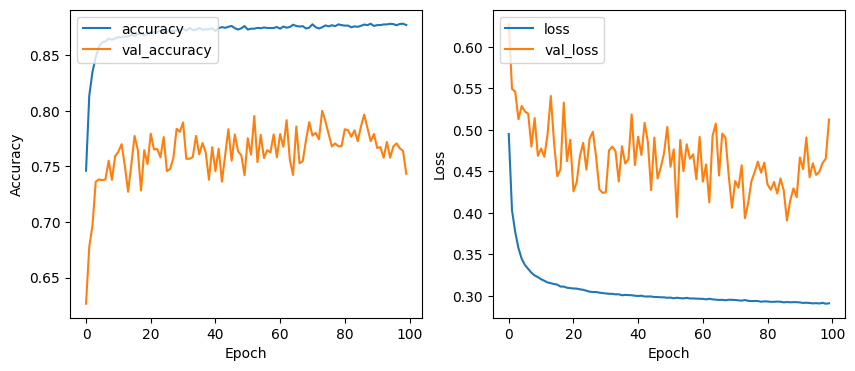

119/119 [==============================] - 0s 1ms/step - loss: 0.3358 - accuracy: 0.8617
num_nodes: 16, dropout: 0, learning_rate: 0.001, batch_size: 64


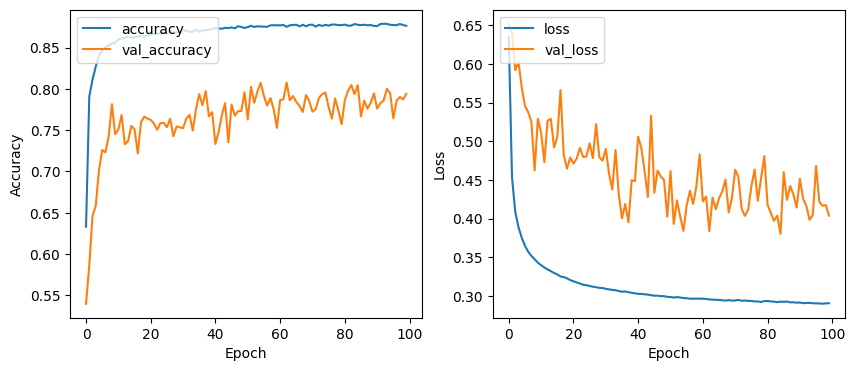

119/119 [==============================] - 0s 1ms/step - loss: 0.3373 - accuracy: 0.8604
num_nodes: 16, dropout: 0, learning_rate: 0.001, batch_size: 128


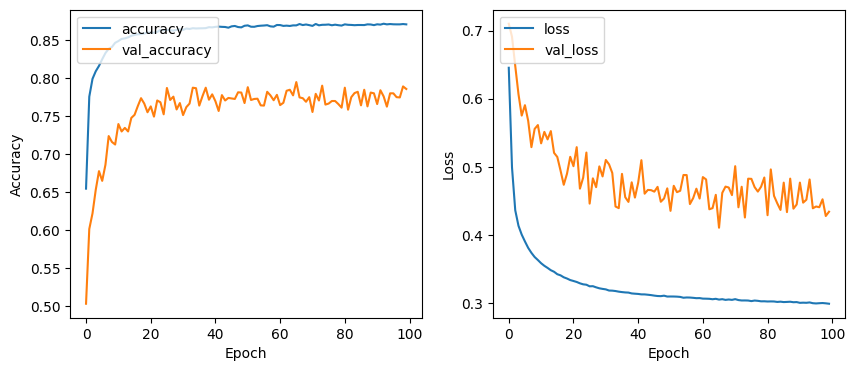

119/119 [==============================] - 0s 2ms/step - loss: 0.3313 - accuracy: 0.8591
num_nodes: 16, dropout: 0, learning_rate: 0.005, batch_size: 32


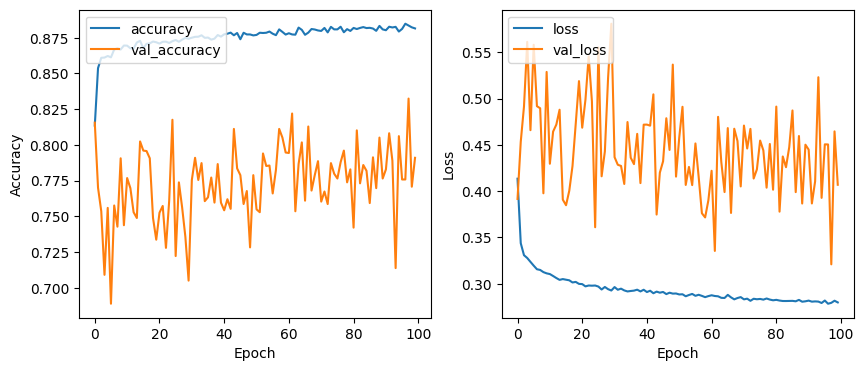

119/119 [==============================] - 0s 1ms/step - loss: 0.3384 - accuracy: 0.8641
num_nodes: 16, dropout: 0, learning_rate: 0.005, batch_size: 64


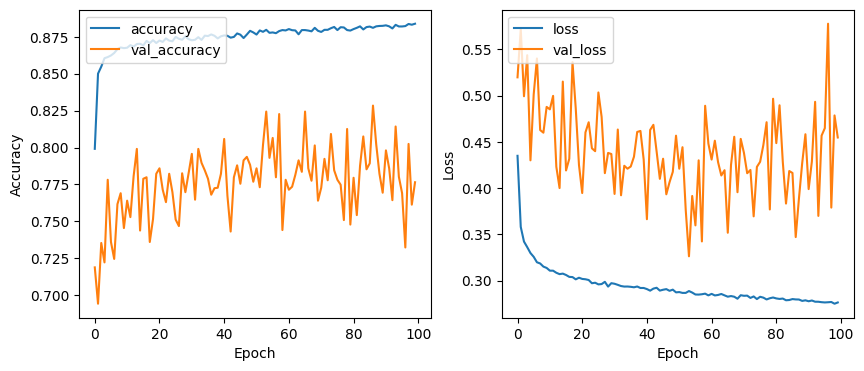

119/119 [==============================] - 0s 1ms/step - loss: 0.3356 - accuracy: 0.8638
num_nodes: 16, dropout: 0, learning_rate: 0.005, batch_size: 128


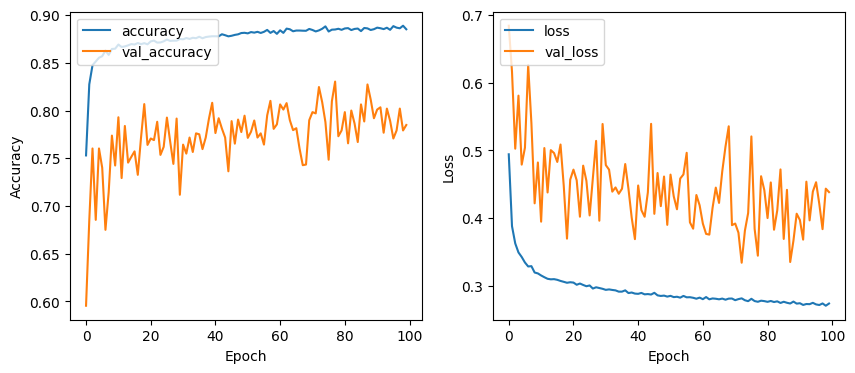

119/119 [==============================] - 0s 1ms/step - loss: 0.3269 - accuracy: 0.8612
num_nodes: 16, dropout: 0.2, learning_rate: 0.01, batch_size: 32


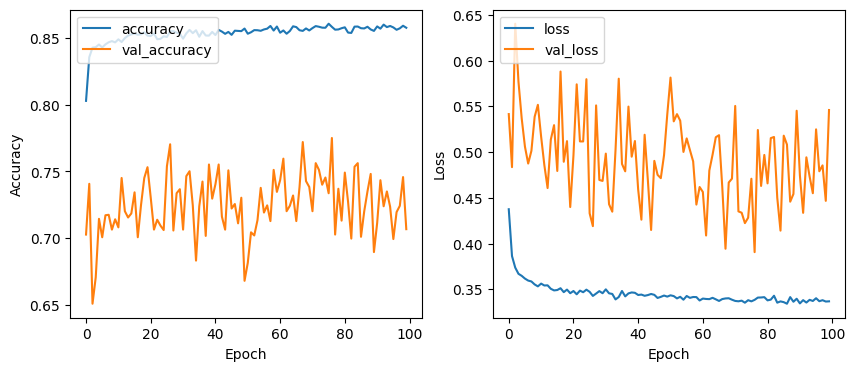

119/119 [==============================] - 0s 1ms/step - loss: 0.3385 - accuracy: 0.8630
num_nodes: 16, dropout: 0.2, learning_rate: 0.01, batch_size: 64


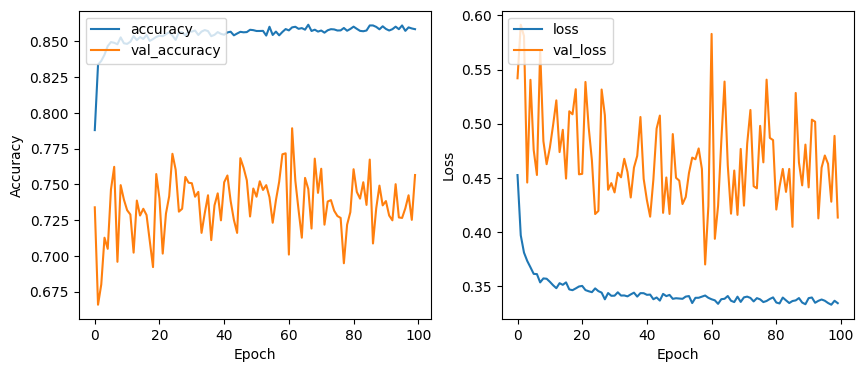

119/119 [==============================] - 0s 1ms/step - loss: 0.3349 - accuracy: 0.8625
num_nodes: 16, dropout: 0.2, learning_rate: 0.01, batch_size: 128


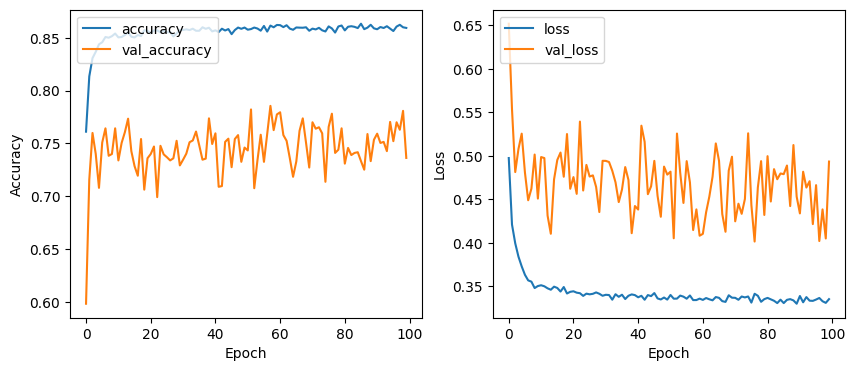

119/119 [==============================] - 0s 1ms/step - loss: 0.3297 - accuracy: 0.8693
num_nodes: 16, dropout: 0.2, learning_rate: 0.001, batch_size: 32


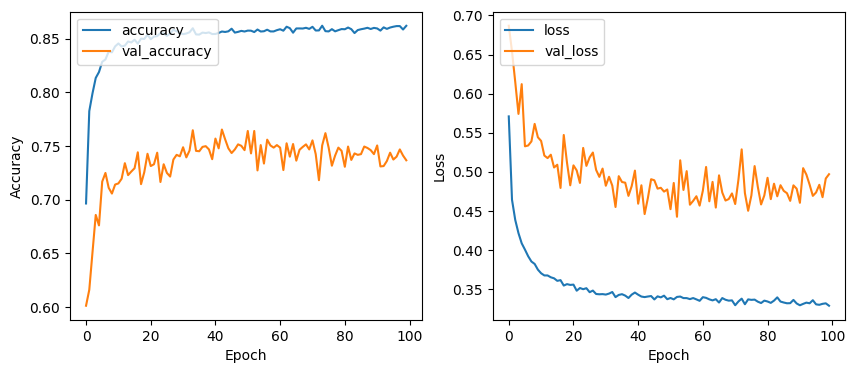

119/119 [==============================] - 0s 1ms/step - loss: 0.3269 - accuracy: 0.8636
num_nodes: 16, dropout: 0.2, learning_rate: 0.001, batch_size: 64


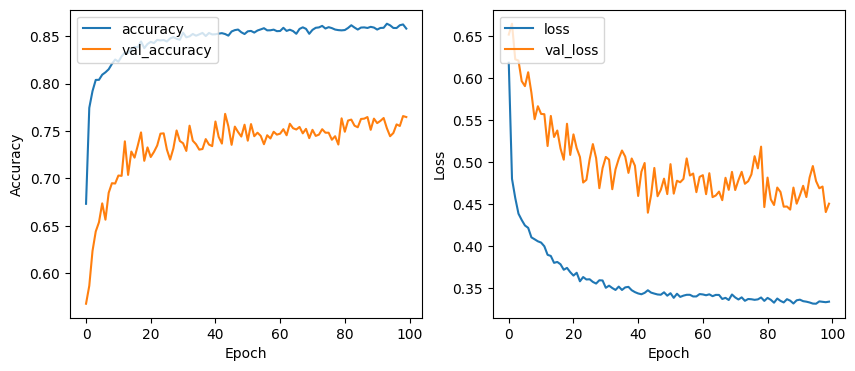

119/119 [==============================] - 0s 1ms/step - loss: 0.3304 - accuracy: 0.8636
num_nodes: 16, dropout: 0.2, learning_rate: 0.001, batch_size: 128


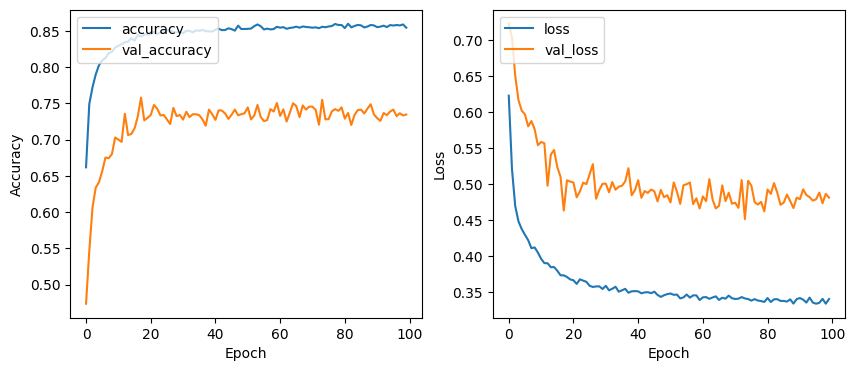

119/119 [==============================] - 0s 1ms/step - loss: 0.3306 - accuracy: 0.8672
num_nodes: 16, dropout: 0.2, learning_rate: 0.005, batch_size: 32


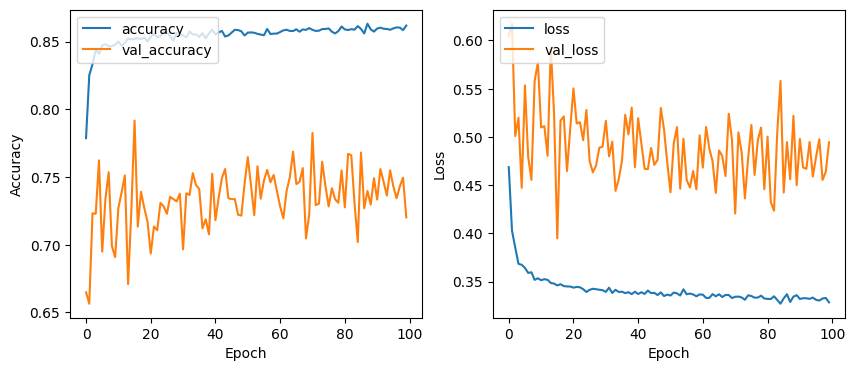

119/119 [==============================] - 0s 1ms/step - loss: 0.3295 - accuracy: 0.8662
num_nodes: 16, dropout: 0.2, learning_rate: 0.005, batch_size: 64


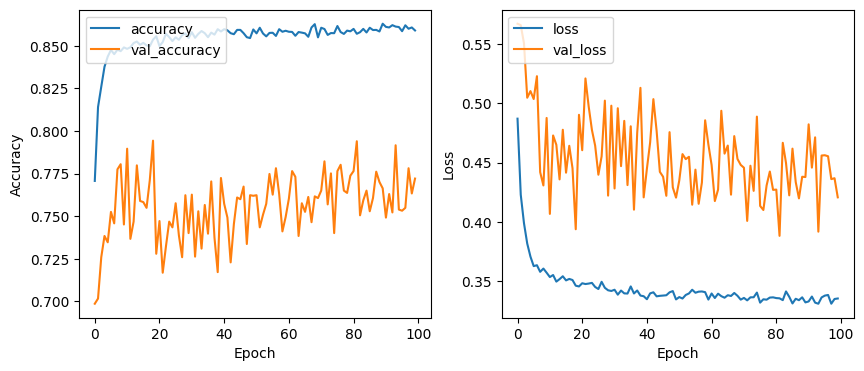

119/119 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.8636
num_nodes: 16, dropout: 0.2, learning_rate: 0.005, batch_size: 128


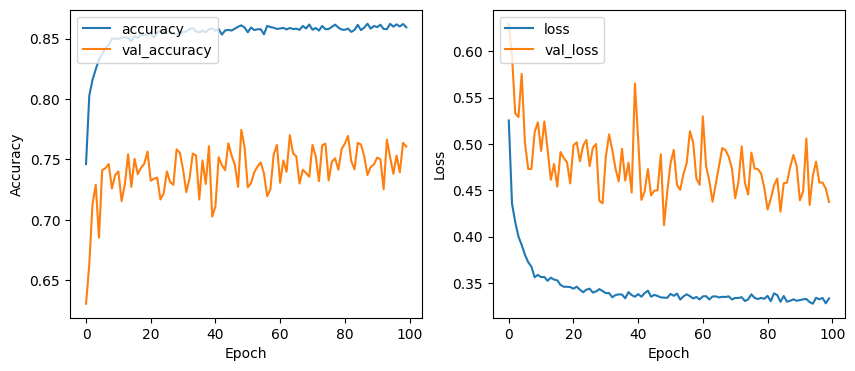

119/119 [==============================] - 0s 1ms/step - loss: 0.3337 - accuracy: 0.8636
num_nodes: 32, dropout: 0, learning_rate: 0.01, batch_size: 32


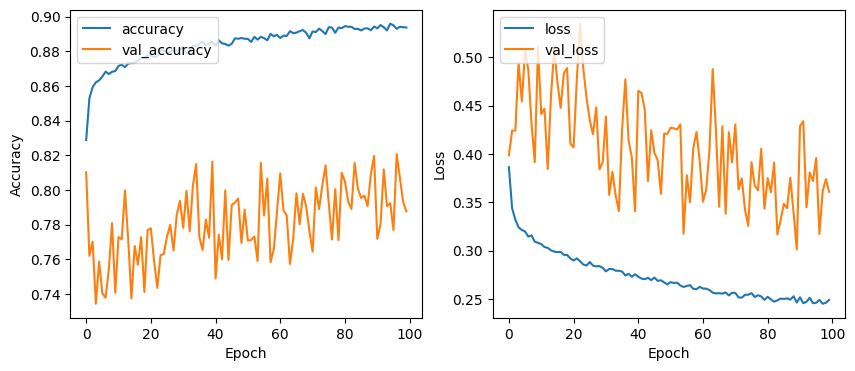

119/119 [==============================] - 0s 1ms/step - loss: 0.3911 - accuracy: 0.8567
num_nodes: 32, dropout: 0, learning_rate: 0.01, batch_size: 64


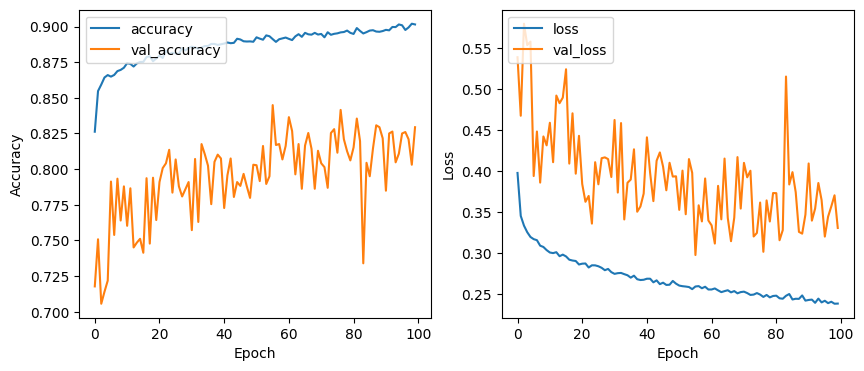

119/119 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.8596
num_nodes: 32, dropout: 0, learning_rate: 0.01, batch_size: 128


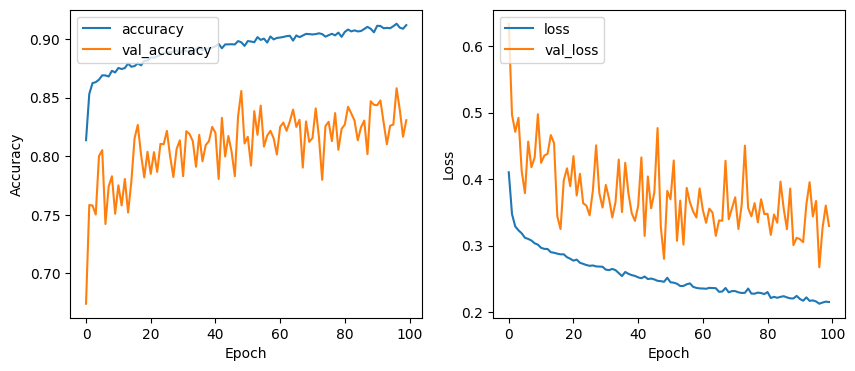

119/119 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.8654
num_nodes: 32, dropout: 0, learning_rate: 0.001, batch_size: 32


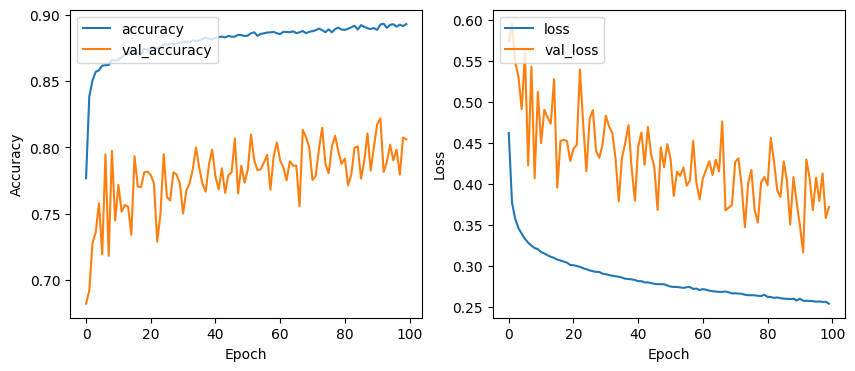

119/119 [==============================] - 0s 1ms/step - loss: 0.3381 - accuracy: 0.8638
num_nodes: 32, dropout: 0, learning_rate: 0.001, batch_size: 64


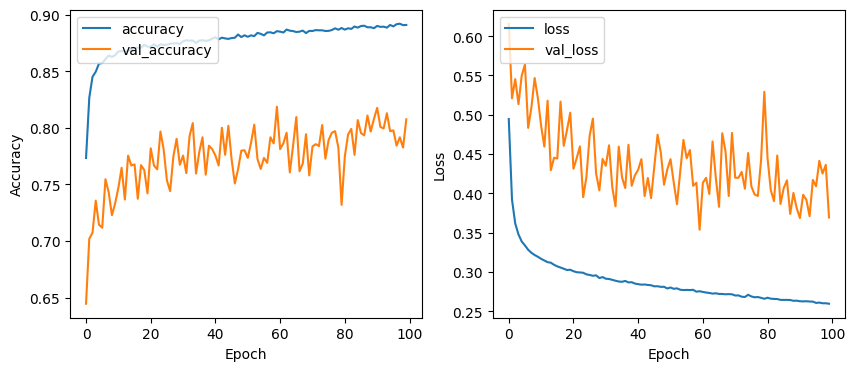

119/119 [==============================] - 0s 1ms/step - loss: 0.3396 - accuracy: 0.8646
num_nodes: 32, dropout: 0, learning_rate: 0.001, batch_size: 128


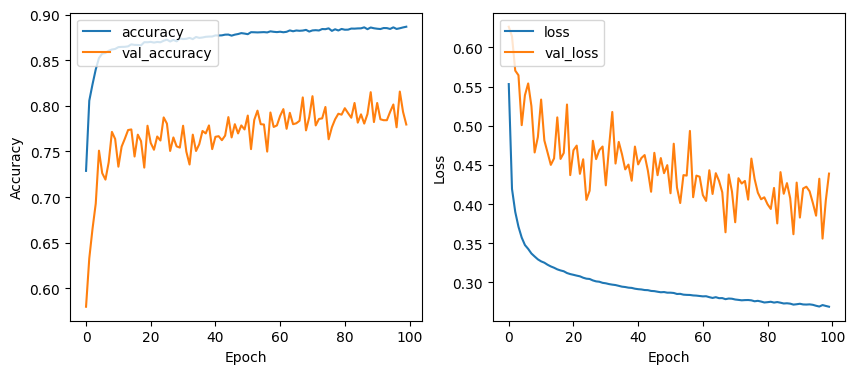

119/119 [==============================] - 0s 1ms/step - loss: 0.3290 - accuracy: 0.8649
num_nodes: 32, dropout: 0, learning_rate: 0.005, batch_size: 32


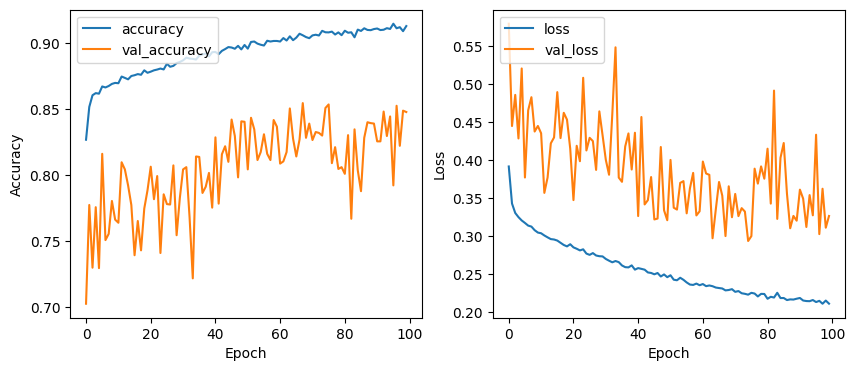

119/119 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.8538
num_nodes: 32, dropout: 0, learning_rate: 0.005, batch_size: 64


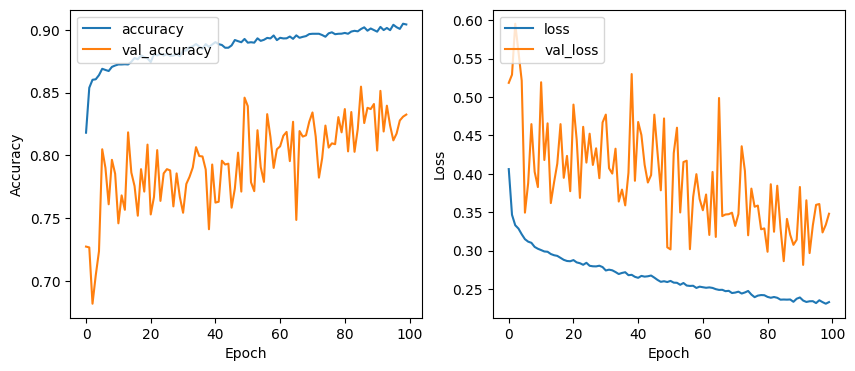

119/119 [==============================] - 0s 1ms/step - loss: 0.3895 - accuracy: 0.8573
num_nodes: 32, dropout: 0, learning_rate: 0.005, batch_size: 128


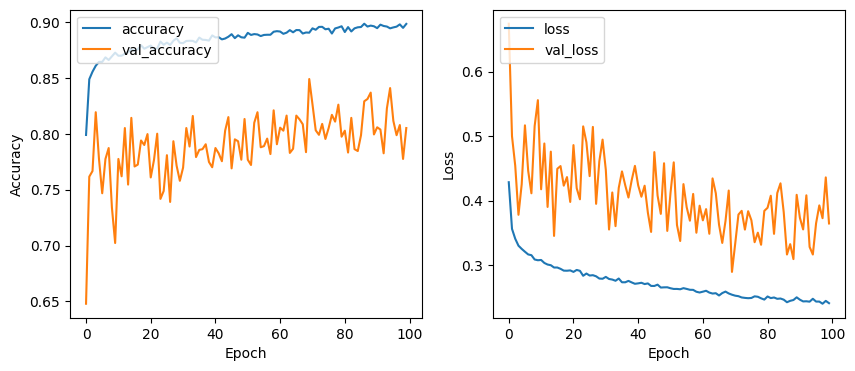

119/119 [==============================] - 0s 1ms/step - loss: 0.3570 - accuracy: 0.8554
num_nodes: 32, dropout: 0.2, learning_rate: 0.01, batch_size: 32


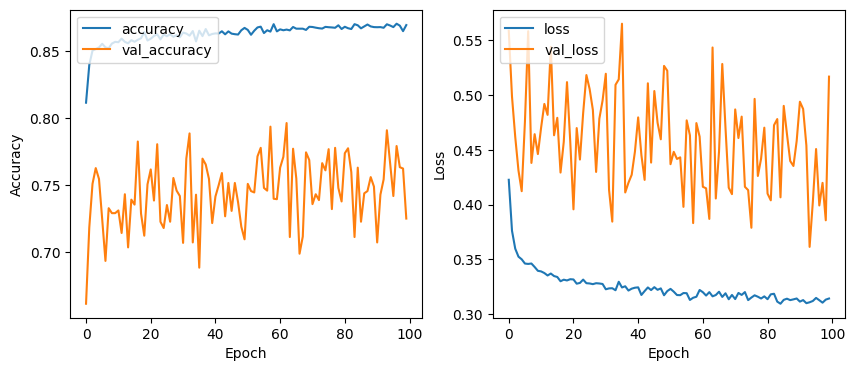

119/119 [==============================] - 0s 1ms/step - loss: 0.3258 - accuracy: 0.8683
num_nodes: 32, dropout: 0.2, learning_rate: 0.01, batch_size: 64


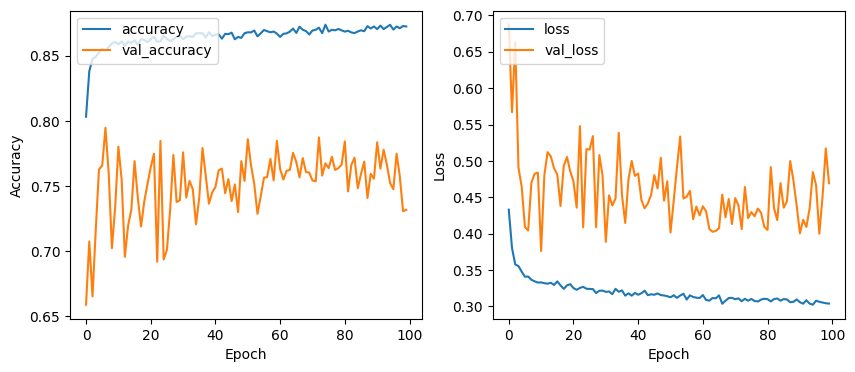

119/119 [==============================] - 0s 1ms/step - loss: 0.3308 - accuracy: 0.8636
num_nodes: 32, dropout: 0.2, learning_rate: 0.01, batch_size: 128


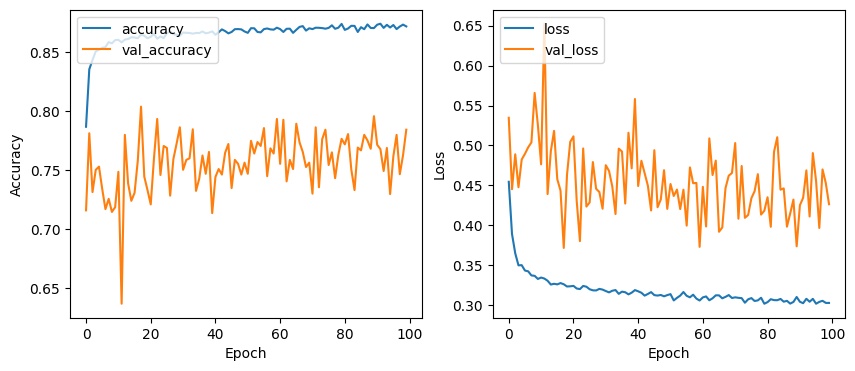

119/119 [==============================] - 0s 1ms/step - loss: 0.3208 - accuracy: 0.8654
num_nodes: 32, dropout: 0.2, learning_rate: 0.001, batch_size: 32


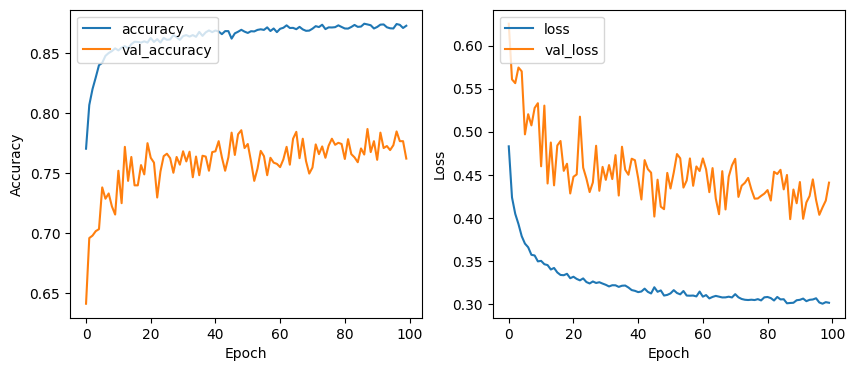

119/119 [==============================] - 0s 1ms/step - loss: 0.3174 - accuracy: 0.8704
num_nodes: 32, dropout: 0.2, learning_rate: 0.001, batch_size: 64


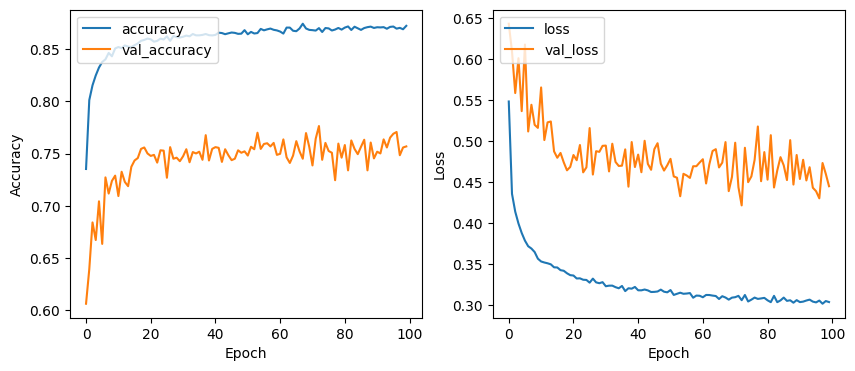

119/119 [==============================] - 0s 1ms/step - loss: 0.3159 - accuracy: 0.8715
num_nodes: 32, dropout: 0.2, learning_rate: 0.001, batch_size: 128


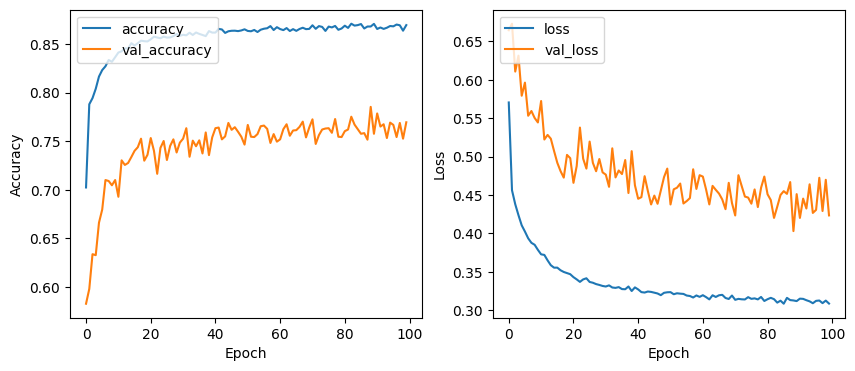

119/119 [==============================] - 0s 1ms/step - loss: 0.3246 - accuracy: 0.8644
num_nodes: 32, dropout: 0.2, learning_rate: 0.005, batch_size: 32


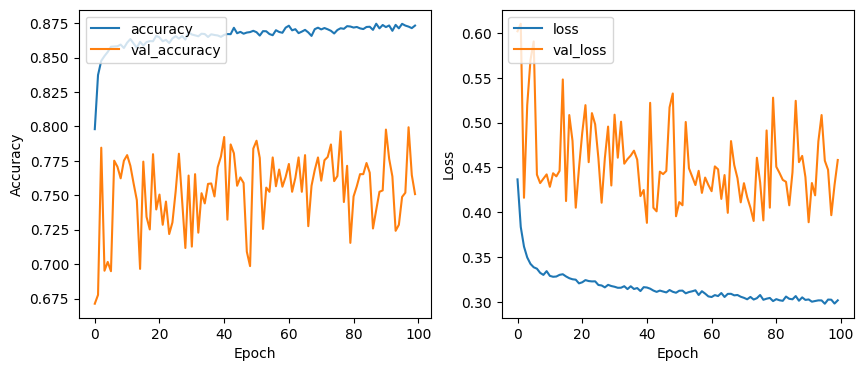

119/119 [==============================] - 0s 1ms/step - loss: 0.3228 - accuracy: 0.8730
num_nodes: 32, dropout: 0.2, learning_rate: 0.005, batch_size: 64


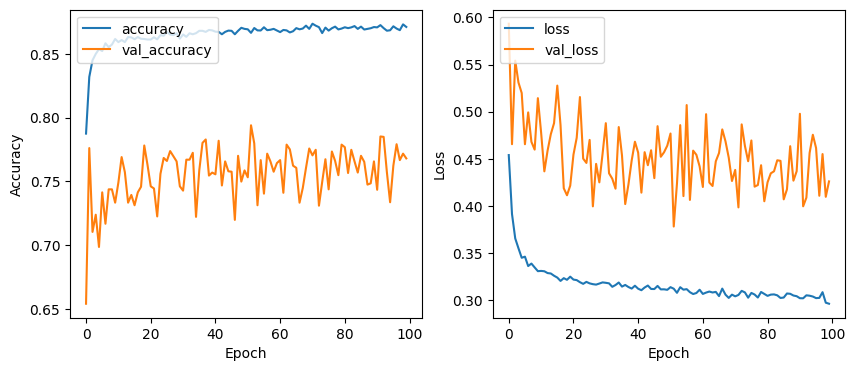

119/119 [==============================] - 0s 1ms/step - loss: 0.3166 - accuracy: 0.8715
num_nodes: 32, dropout: 0.2, learning_rate: 0.005, batch_size: 128


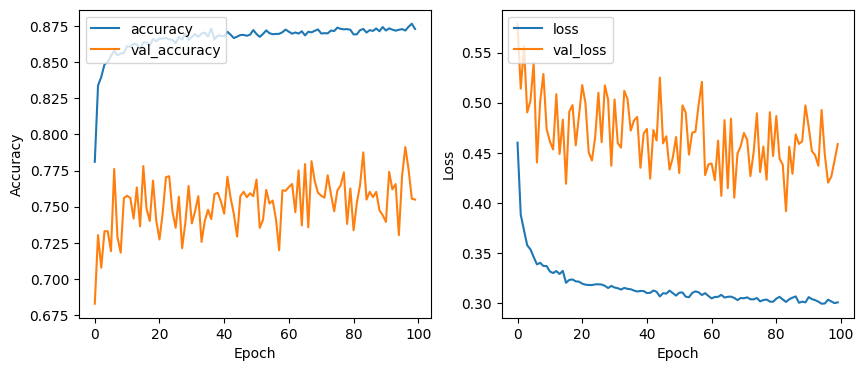

119/119 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8733
num_nodes: 64, dropout: 0, learning_rate: 0.01, batch_size: 32


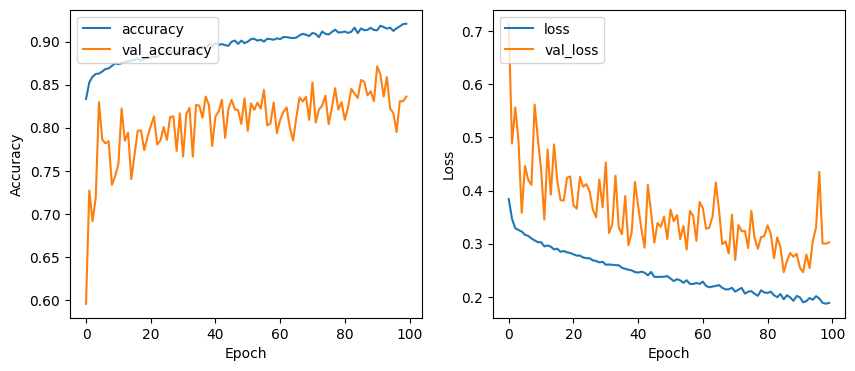

119/119 [==============================] - 0s 2ms/step - loss: 0.5588 - accuracy: 0.8625
num_nodes: 64, dropout: 0, learning_rate: 0.01, batch_size: 64


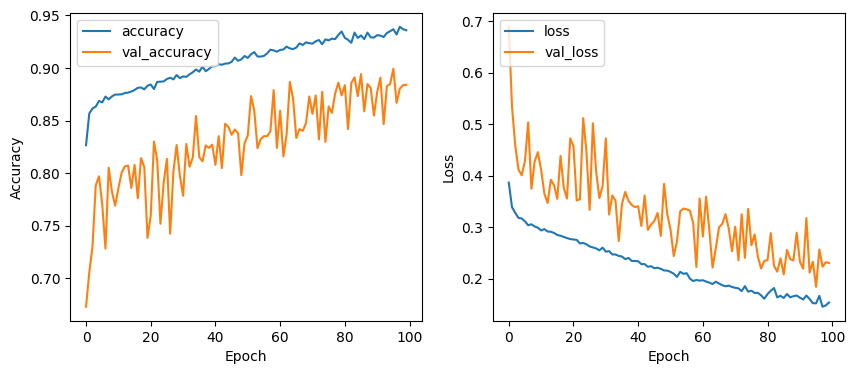

119/119 [==============================] - 0s 2ms/step - loss: 0.6108 - accuracy: 0.8573
num_nodes: 64, dropout: 0, learning_rate: 0.01, batch_size: 128


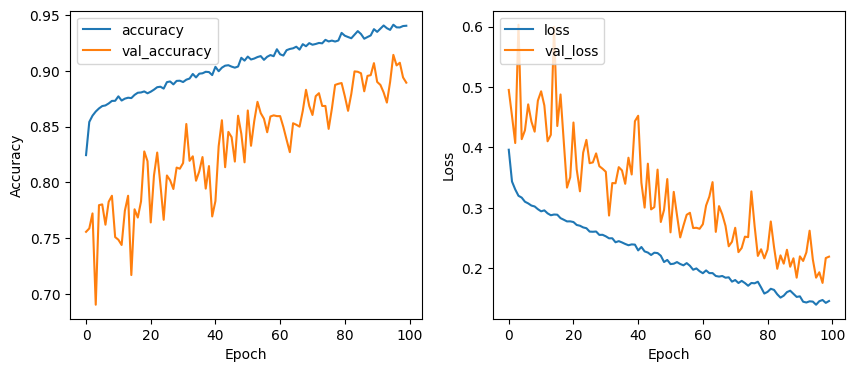

119/119 [==============================] - 0s 1ms/step - loss: 0.6335 - accuracy: 0.8417
num_nodes: 64, dropout: 0, learning_rate: 0.001, batch_size: 32


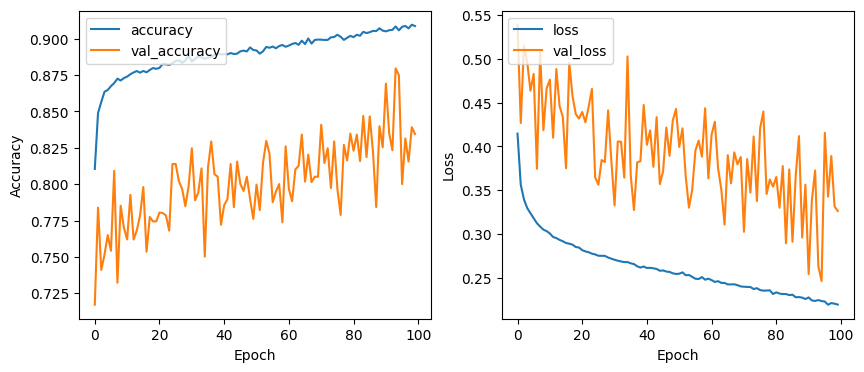

119/119 [==============================] - 0s 1ms/step - loss: 0.3552 - accuracy: 0.8612
num_nodes: 64, dropout: 0, learning_rate: 0.001, batch_size: 64


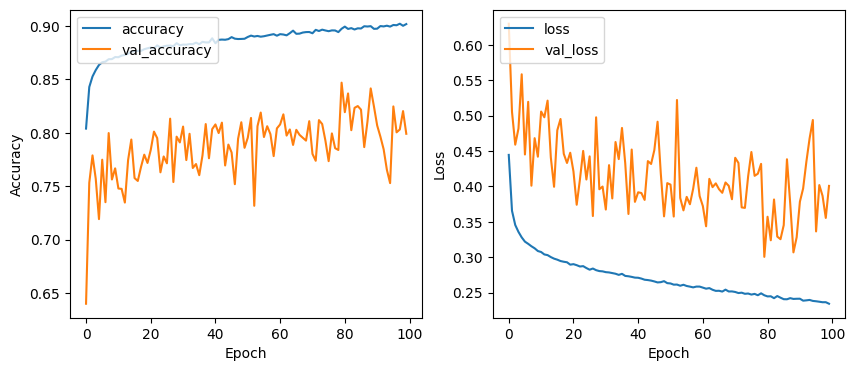

119/119 [==============================] - 0s 1ms/step - loss: 0.3487 - accuracy: 0.8604
num_nodes: 64, dropout: 0, learning_rate: 0.001, batch_size: 128


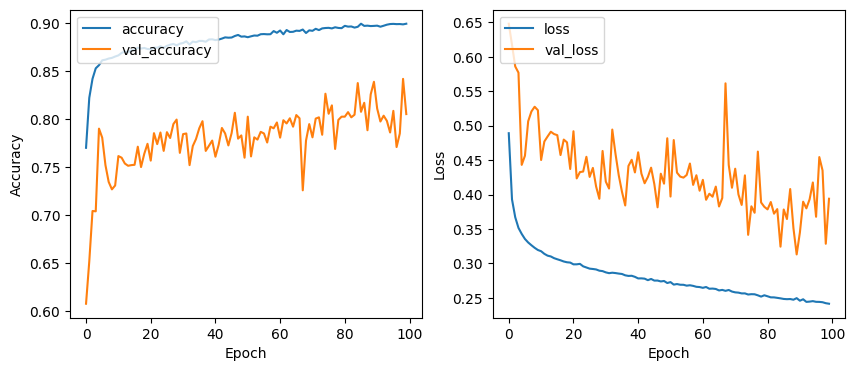

119/119 [==============================] - 0s 1ms/step - loss: 0.3475 - accuracy: 0.8630
num_nodes: 64, dropout: 0, learning_rate: 0.005, batch_size: 32


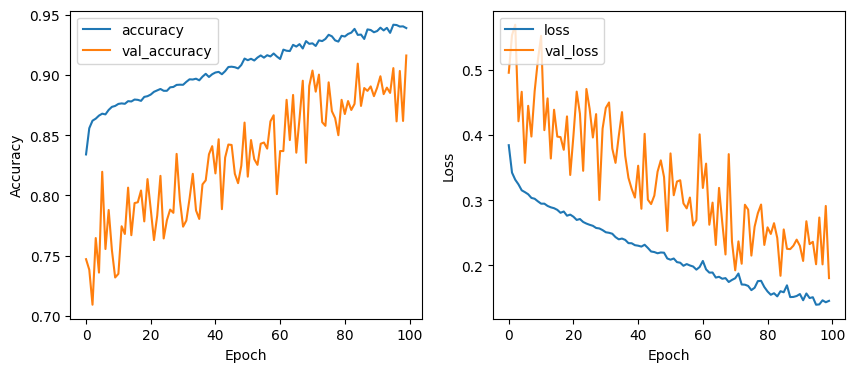

119/119 [==============================] - 0s 1ms/step - loss: 0.6319 - accuracy: 0.8394
num_nodes: 64, dropout: 0, learning_rate: 0.005, batch_size: 64


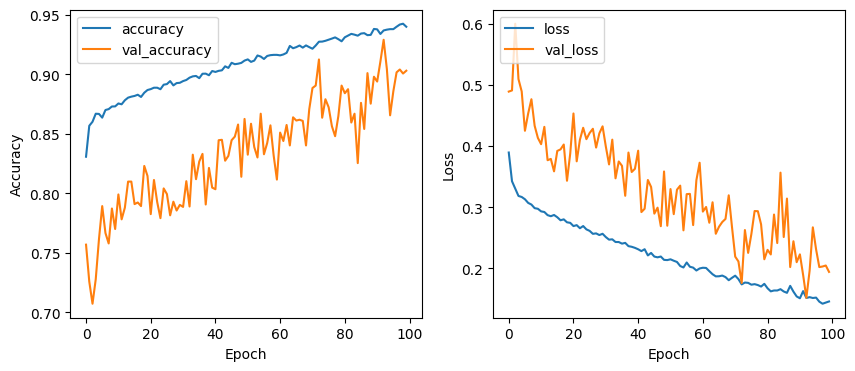

119/119 [==============================] - 0s 1ms/step - loss: 0.5732 - accuracy: 0.8475
num_nodes: 64, dropout: 0, learning_rate: 0.005, batch_size: 128


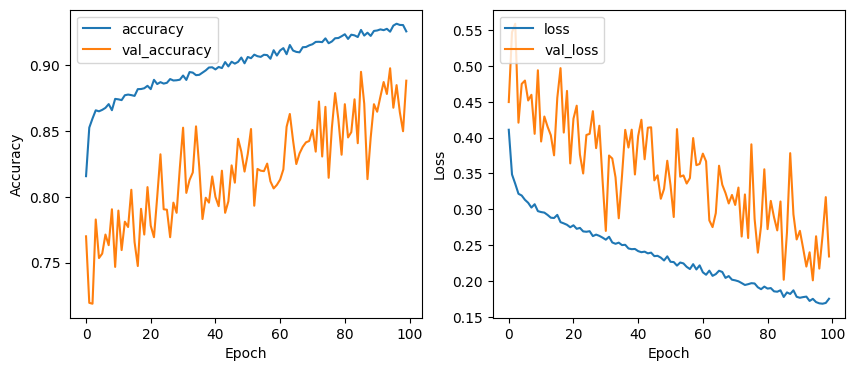

119/119 [==============================] - 0s 1ms/step - loss: 0.4987 - accuracy: 0.8486
num_nodes: 64, dropout: 0.2, learning_rate: 0.01, batch_size: 32


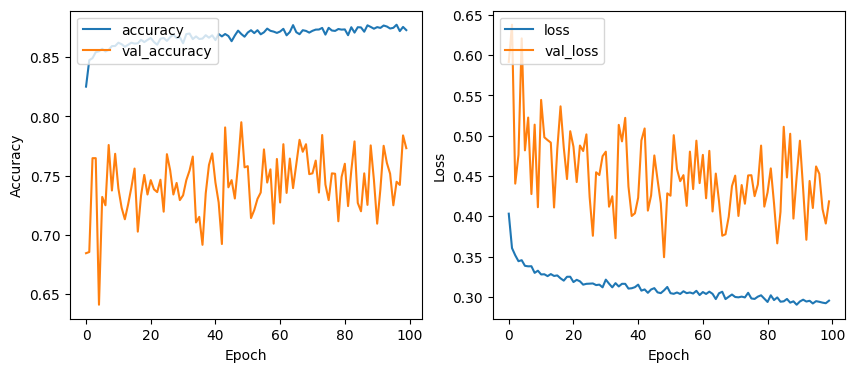

119/119 [==============================] - 0s 1ms/step - loss: 0.3459 - accuracy: 0.8678
num_nodes: 64, dropout: 0.2, learning_rate: 0.01, batch_size: 64


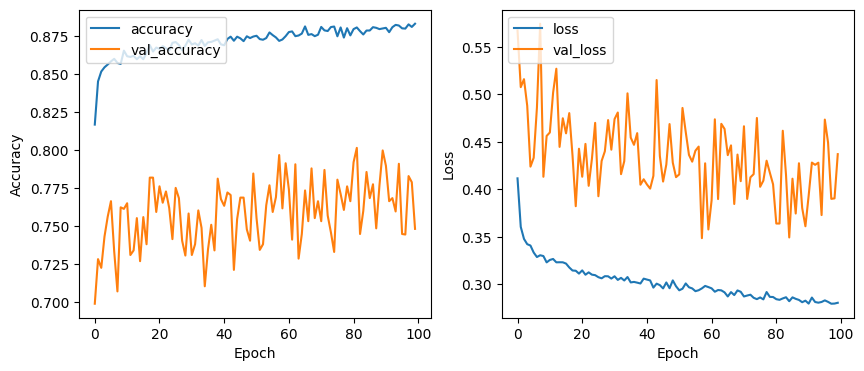

119/119 [==============================] - 0s 1ms/step - loss: 0.3218 - accuracy: 0.8699
num_nodes: 64, dropout: 0.2, learning_rate: 0.01, batch_size: 128


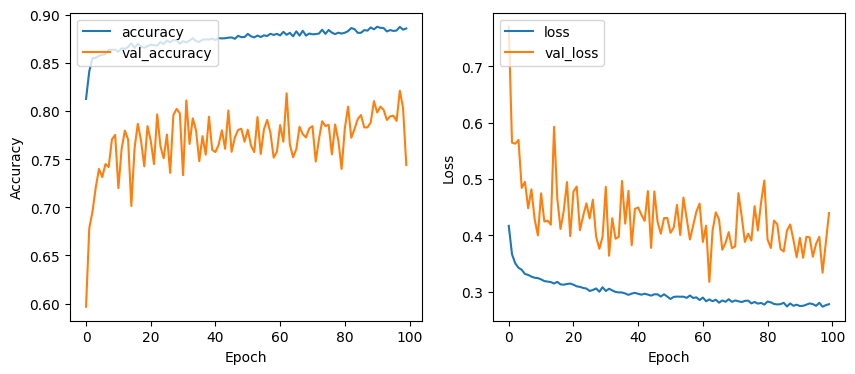

119/119 [==============================] - 0s 2ms/step - loss: 0.3183 - accuracy: 0.8730
num_nodes: 64, dropout: 0.2, learning_rate: 0.001, batch_size: 32


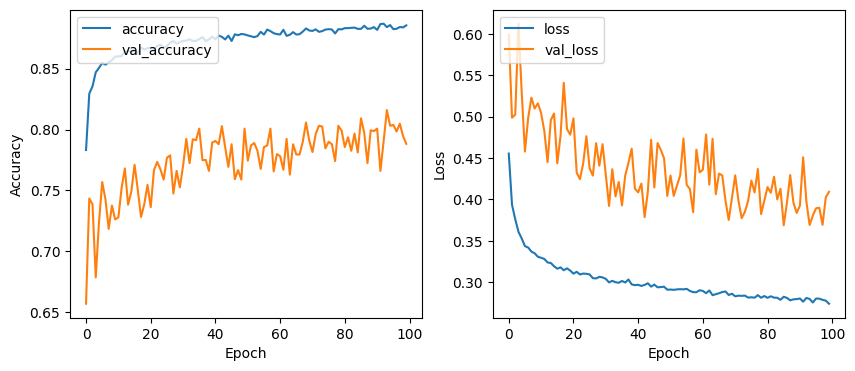

119/119 [==============================] - 0s 1ms/step - loss: 0.3189 - accuracy: 0.8725
num_nodes: 64, dropout: 0.2, learning_rate: 0.001, batch_size: 64


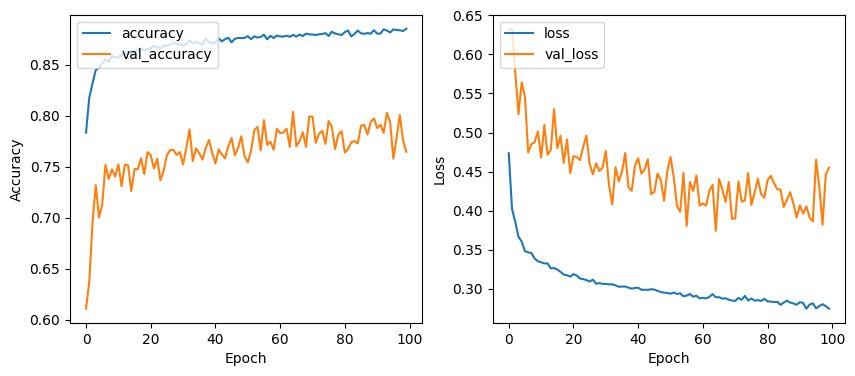

119/119 [==============================] - 0s 1ms/step - loss: 0.3105 - accuracy: 0.8743
num_nodes: 64, dropout: 0.2, learning_rate: 0.001, batch_size: 128


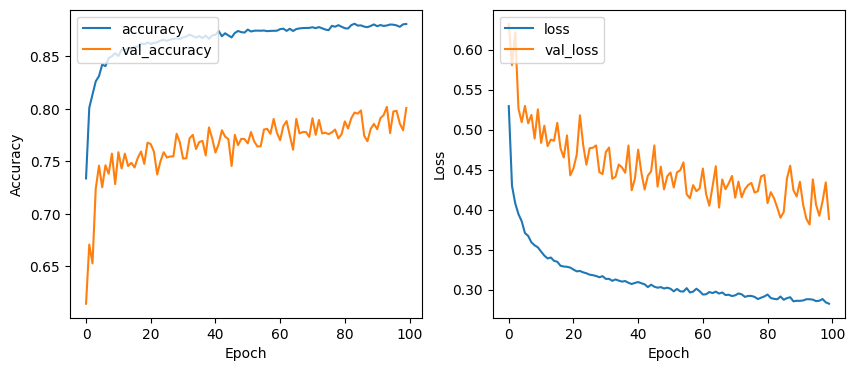

119/119 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.8662
num_nodes: 64, dropout: 0.2, learning_rate: 0.005, batch_size: 32


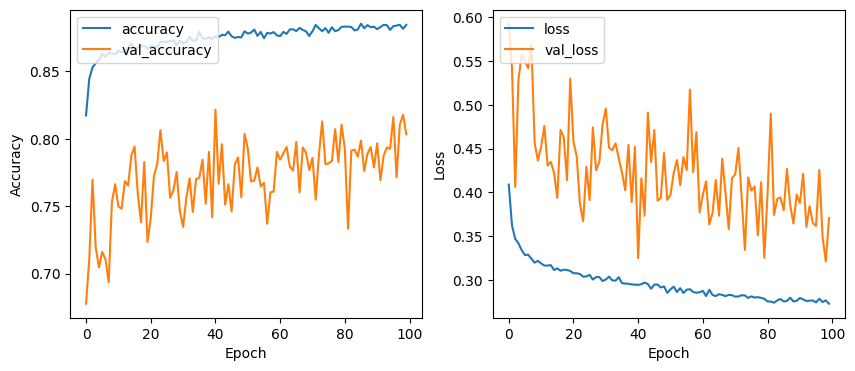

119/119 [==============================] - 0s 1ms/step - loss: 0.3205 - accuracy: 0.8722
num_nodes: 64, dropout: 0.2, learning_rate: 0.005, batch_size: 64


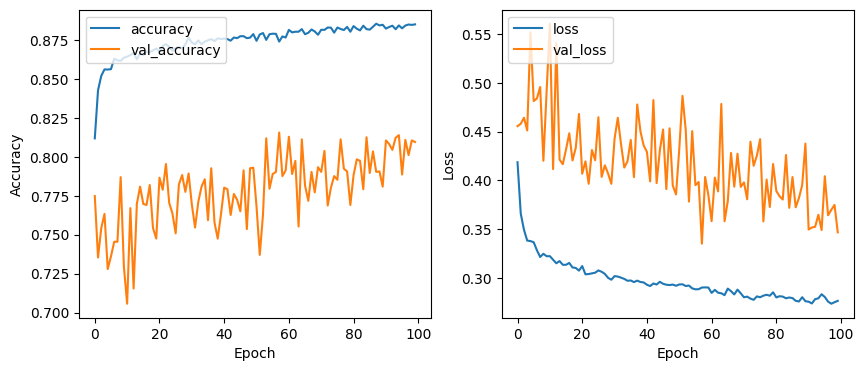

119/119 [==============================] - 0s 1ms/step - loss: 0.3167 - accuracy: 0.8686
num_nodes: 64, dropout: 0.2, learning_rate: 0.005, batch_size: 128


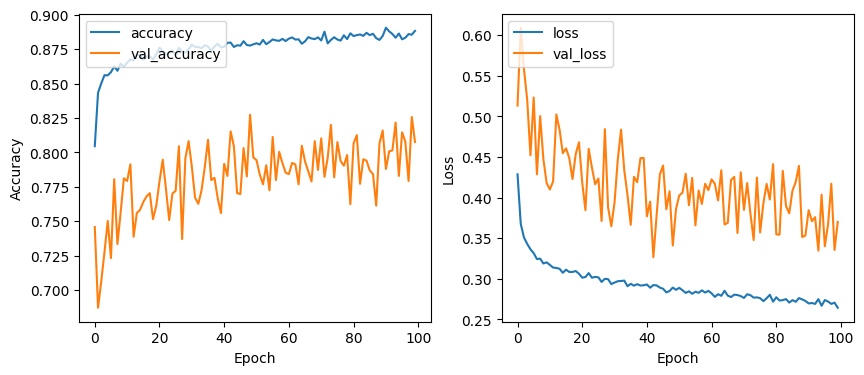

119/119 [==============================] - 0s 1ms/step - loss: 0.3206 - accuracy: 0.8693


In [66]:
least_val_loss = float('inf')
least_loss_model = None

epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for learn_rate in [0.01, 0.001, 0.005]:
      for batch_size in [32, 64, 128]:
        print(f"num_nodes: {num_nodes}, dropout: {dropout_prob}, learning_rate: {learn_rate}, batch_size: {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, learn_rate, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]

        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [67]:
y_pred = least_loss_model.predict(X_test) # returns probability
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
y_pred

119/119 [==============================] - 0s 1ms/step


array([0, 1, 1, ..., 0, 1, 1])

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1393
           1       0.87      0.96      0.91      2411

    accuracy                           0.88      3804
   macro avg       0.89      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

